In [1]:
import mne, os, glob
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mne.time_frequency import tfr_morlet
%matplotlib qt 

In [2]:
""" 
Load data
"""
path = "C:/Users/mvmigem/Documents/data/project_1/uncorrected_epochs/pre_stim-epo.fif"
epochs = mne.read_epochs(path)

Reading C:\Users\mvmigem\Documents\data\project_1\uncorrected_epochs\pre_stim-epo.fif ...
    Found the data of interest:
        t =    -449.22 ...     101.56 ms
        0 CTF compensation matrices available
Adding metadata with 35 columns
9025 matching events found
No baseline correction applied
0 projection items activated


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


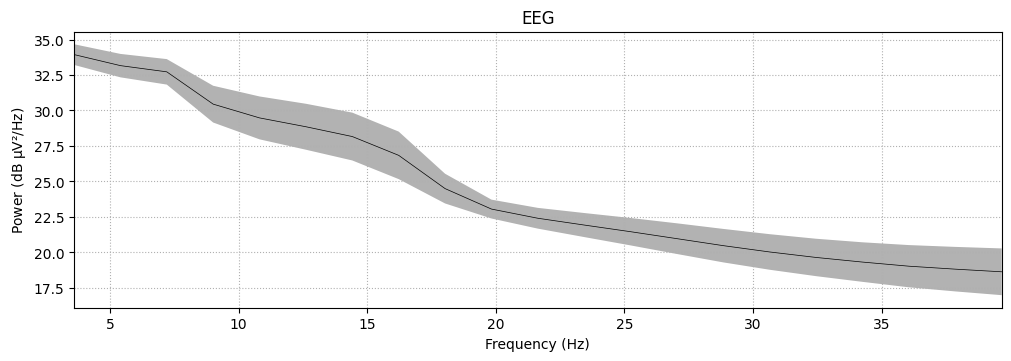

In [4]:
""" 
Frequency analysis
"""
epochs.compute_psd(fmin=2.0, fmax=40.0).plot(
    average=True, amplitude=False, picks="data", exclude="bads"
)

In [17]:
sub_list = epochs.metadata['participant'].unique() 

In [20]:
freqs = np.logspace(*np.log10([6, 35]), num=8)
n_cycles = freqs / 3.0  # different number of cycle per frequency
power, itc = epochs.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    average=True,
    return_itc=True,
    decim=3,
)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   11.7s
